# Phase 2: Baseline Models

Benchmark: Naive, Moving Average, Linear Regression with lag features.

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data_loader import REPO_ROOT, load_and_merge_data, get_aggregated_series
from src.models.baselines import NaiveForecast, MovingAverageForecast, LinearRegressionWithLags
from src.metrics import evaluate_forecasts

## 1. Load Data & Time Split

In [2]:
data_dir = REPO_ROOT / "data" / "store-sales-time-series-forecasting"
df = load_and_merge_data(data_dir)
daily_sales = get_aggregated_series(df)

# Time-based split: train 2013-2016, validate first 2 months of 2017
train_end = '2016-12-31'
val_start = '2017-01-01'
val_end = '2017-02-28'

train = daily_sales.loc[:train_end]
val = daily_sales.loc[val_start:val_end]

print(f"Train: {len(train)} days, Val: {len(val)} days")

Train: 1457 days, Val: 59 days


## 2. Baseline Models

In [3]:
horizon = len(val)
y_true = val.values

# Naive
naive = NaiveForecast().fit(train.values)
y_naive = naive.predict(horizon)

# Moving Average (7-day)
ma = MovingAverageForecast(window=7).fit(train.values)
y_ma = ma.predict(horizon)

# Linear Regression with Lags
lr = LinearRegressionWithLags(lags=[1, 7, 14, 30]).fit(train)
y_lr = lr.predict(horizon, series=train)

/Users/adhvaitpurayil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhvaitpurayil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhvaitpurayil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhvaitpurayil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adhvaitpurayil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/adh

## 3. Metrics

In [4]:
results = {
    'Naive': evaluate_forecasts(y_true, y_naive),
    'MovingAvg(7)': evaluate_forecasts(y_true, y_ma),
    'LinearRegression(Lags)': evaluate_forecasts(y_true, y_lr),
}
pd.DataFrame(results).round(2)

,Naive,MovingAvg(7),LinearRegression(Lags)
MAE,287329.86,237616.01,212884.42
RMSE,339579.92,284184.83,269887.50
MAPE,189.72,172.48,184.76


## 4. Actual vs Predicted

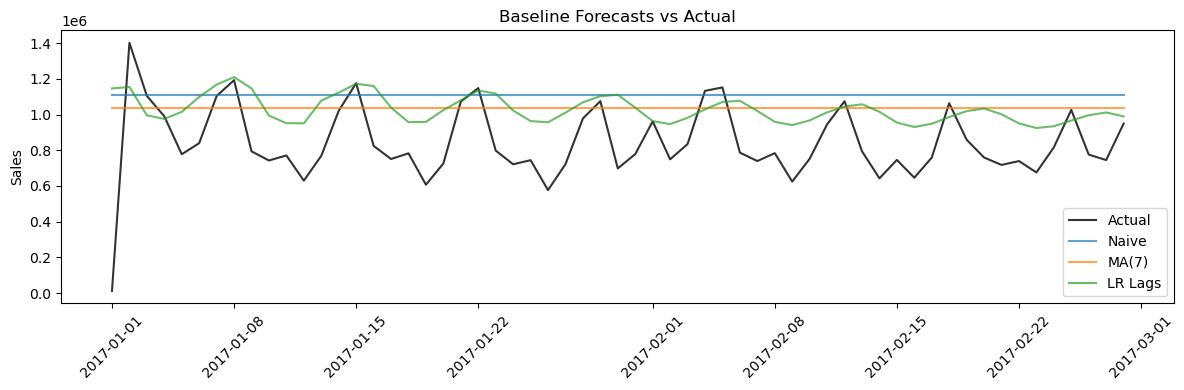

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(val.index, y_true, label='Actual', color='black', alpha=0.8)
ax.plot(val.index, y_naive, label='Naive', alpha=0.7)
ax.plot(val.index, y_ma, label='MA(7)', alpha=0.7)
ax.plot(val.index, y_lr, label='LR Lags', alpha=0.7)
ax.legend()
ax.set_title('Baseline Forecasts vs Actual')
ax.set_ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()